## Income Prediction Challenge 

## BUSINESS UNDERSTANDING

Income inequality, characterized by the uneven distribution of income among a population, poses significant challenges in developing nations. It can lead to social unrest, decreased economic mobility, and hindered economic growth. With the increasing adoption of AI and automation, there is a concern that these technologies could exacerbate the issue by disproportionately benefiting certain segments of the workforce, leaving others behind.


## Objectives

The challenge at hand is to develop a machine learning model capable of predicting whether an individual's income falls above or below a specific threshold. This predictive model aims to provide an accurate assessment of income levels, offering a cost-effective and timely alternative to traditional census methods, which are often expensive and infrequent.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a dataframe
Train_df = pd.read_csv('./Dataset/Income_Train.csv')
Test_df = pd.read_csv('./Dataset/Income_Test.csv')

In [3]:
Train_df.shape

(209499, 43)

In [4]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [5]:
Train_df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


**Checking if there are duplicates in the datasets**

In [6]:
Train_df.duplicated().sum()

np.int64(0)

**Checking if there are missing values in the datasets**

In [7]:
Train_df.isna().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [8]:
Train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,209499,209499,ID_TZ99999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,209499.0,NaN,NaN,NaN,34.518728,22.306738,0.0,15.0,33.0,50.0,90.0
gender,209499,2,Female,108784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,209499,17,High school graduate,50627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,104254,8,Private,75617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_institute,13302,2,High school,7247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,209499,7,Never married,90723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,209499,5,White,175709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_hispanic,209499,10,All other,180404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_commitment,209499,8,Children or Armed Forces,129789,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for column in Train_df.columns:
    print(f'{column} are:\n {Train_df[column].unique()}\n\
    Number of Unique {column} = {Train_df[column].nunique()}')

ID are:
 ['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999']
    Number of Unique ID = 209499
age are:
 [79 65 21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85
 29 41 14 33 67 52 11  9 13 19 26 23 37 58 63 46 62 28 31  3 18 78 15 38
  7 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87]
    Number of Unique age = 91
gender are:
 [' Female' ' Male']
    Number of Unique gender = 2
education are:
 [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']
    Number of Unique edu

**CLASS**

In [10]:
Train_df['class']= Train_df['class'].fillna(Train_df['class'].mode()[0])

In [11]:
Train_df['class'].unique()

array([' Private', ' Federal government', ' Local government',
       ' Self-employed-incorporated', ' Self-employed-not incorporated',
       ' State government', ' Without pay', ' Never worked'], dtype=object)

##### Observation
Replaced Missing value to most frquent i.e Private

**education_institute**

In [12]:
Train_df['education_institute']= Train_df['education_institute'].fillna(Train_df['education_institute'].mode()[0])

In [13]:
Train_df['education_institute'].unique()

array([' High school', ' College or university'], dtype=object)

##### Observation
Replaced Missing value to most frquent i.e High school

**marital_status**

In [14]:
Train_df['marital_status']= Train_df['marital_status'].replace(' Married-A F spouse present', 'Married-spouse present')

In [15]:
Train_df['marital_status'].unique()

array([' Widowed', ' Never married', ' Married-civilian spouse present',
       ' Divorced', ' Married-spouse absent', ' Separated',
       'Married-spouse present'], dtype=object)

##### Observation
Replaced Married-A F spouse present with Married-spouse present

**is_hispanic**

In [16]:
Train_df['is_hispanic'] = Train_df['is_hispanic'].replace(' NA', 'All other')

In [17]:
Train_df['is_hispanic'].unique()

array([' All other', ' Mexican-American', ' Central or South American',
       ' Mexican (Mexicano)', ' Puerto Rican', ' Other Spanish',
       'All other', ' Cuban', ' Do not know', ' Chicano'], dtype=object)

##### Observation
Replaced Na value to the most frequent i.e All other

**unemployment_reason**

In [18]:
Train_df['unemployment_reason'] = Train_df['unemployment_reason'].fillna(' Other job loser')

In [19]:
Train_df['unemployment_reason'].mode()

0     Other job loser
Name: unemployment_reason, dtype: object

In [20]:
Train_df['unemployment_reason'].unique()

array([' Other job loser', ' Re-entrant', ' Job leaver',
       ' Job loser - on layoff', ' New entrant'], dtype=object)

##### Observations
we have missing values of 202979 in numbers, we fill them with most frequent i.e Other job loser

**is_labor_union**

In [21]:
Train_df['is_labor_union'] = Train_df['is_labor_union'].fillna(' No')

In [22]:
Train_df['is_labor_union'].unique()

array([' No', 'Same'], dtype=object)

##### Observations
we have missing values, we fill them with most frequent i.e No

**occupation_code_main**

In [23]:
Train_df['occupation_code_main'] = Train_df['occupation_code_main'].fillna(' Adm support including clerical')

In [24]:
Train_df['occupation_code_main'].unique()

array([' Adm support including clerical', ' Other service',
       ' Executive admin and managerial', ' Sales',
       ' Machine operators assmblrs & inspctrs',
       ' Precision production craft & repair', ' Professional specialty',
       ' Handlers equip cleaners etc ',
       ' Transportation and material moving',
       ' Farming forestry and fishing', ' Private household services',
       ' Technicians and related support', ' Protective services',
       ' Armed Forces'], dtype=object)

In [25]:
Train_df['occupation_code_main'].value_counts()

occupation_code_main
Adm support including clerical           121045
Professional specialty                    14544
Executive admin and managerial            13107
Other service                             12856
Sales                                     12487
Precision production craft & repair       11207
Machine operators assmblrs & inspctrs      6650
Handlers equip cleaners etc                4340
Transportation and material moving         4244
Farming forestry and fishing               3273
Technicians and related support            3136
Protective services                        1700
Private household services                  878
Armed Forces                                 32
Name: count, dtype: int64

##### Observations
we have missing values, we fill them with most frequent, sadly we discovered that our missing values are the highest, so we replace with the second highest i.e Adm support including clerical

**under_18_family**

In [26]:
Train_df['under_18_family'] = Train_df['under_18_family'].fillna(' Both parents present')

In [27]:
Train_df['under_18_family'].unique()

array([' Both parents present', ' Mother only present',
       ' Father only present', ' Neither parent present'], dtype=object)

##### Observations
we have missing values, we fill them with most frequent i.e Both parents present.

**veterans_admin_questionnaire**

In [28]:
Train_df['veterans_admin_questionnaire'] = Train_df['veterans_admin_questionnaire'].fillna(' No')

In [29]:
Train_df['veterans_admin_questionnaire'].unique()

array([' No', 'Same'], dtype=object)

##### Observations
we have missing values, we fill them with most frequent i.e No.

**country_of_birth_own**

In [30]:
Train_df['country_of_birth_own'] = Train_df['country_of_birth_own'].replace(' ?','US')

In [31]:
Train_df['country_of_birth_own'].unique()

array(['US', ' El-Salvador', ' Mexico', ' Philippines', ' Cambodia',
       ' China', ' Hungary', ' Puerto-Rico', ' England',
       ' Dominican-Republic', ' Japan', ' Canada', ' Ecuador', ' Italy',
       ' Cuba', ' Peru', ' Taiwan', ' South Korea', ' Poland',
       ' Nicaragua', ' Germany', ' Guatemala', ' India', ' Ireland',
       ' Honduras', ' France', ' Trinadad&Tobago', ' Thailand', ' Iran',
       ' Vietnam', ' Portugal', ' Laos', ' Panama', ' Scotland',
       ' Columbia', ' Jamaica', ' Greece', ' Haiti', ' Yugoslavia',
       ' Outlying-U S (Guam USVI etc)', ' Holand-Netherlands',
       ' Hong Kong'], dtype=object)

##### Observations
we discovered '?' entry in our dataset, we descided to tag it as a missing value and treat it as such by replacing it withthe most frequent i.e US

**country_of_birth_father**

In [32]:
Train_df['country_of_birth_father'] = Train_df['country_of_birth_father'].replace(' ?','US')

In [33]:
Train_df['country_of_birth_father'].unique()

array(['US', ' India', ' Poland', ' Germany', ' El-Salvador', ' Mexico',
       ' Puerto-Rico', ' Philippines', ' Greece', ' Canada', ' Ireland',
       ' Cambodia', ' Ecuador', ' China', ' Hungary',
       ' Dominican-Republic', ' Japan', ' Italy', ' Cuba', ' Peru',
       ' Jamaica', ' South Korea', ' Yugoslavia', ' Nicaragua',
       ' Columbia', ' Guatemala', ' France', ' England', ' Iran',
       ' Honduras', ' Haiti', ' Trinadad&Tobago',
       ' Outlying-U S (Guam USVI etc)', ' Thailand', ' Vietnam',
       ' Hong Kong', ' Portugal', ' Laos', ' Scotland', ' Taiwan',
       ' Holand-Netherlands', ' Panama'], dtype=object)

##### Observations
we discovered '?' entry in our dataset, we descided to tag it as a missing value and treat it as such by replacing it withthe most frequent i.e US

**country_of_birth_mother**

In [34]:
Train_df['country_of_birth_mother'] = Train_df['country_of_birth_mother'].replace(' ?','US')

In [35]:
Train_df['country_of_birth_mother'].unique()

array(['US', ' India', ' Peru', ' Germany', ' El-Salvador', ' Mexico',
       ' Puerto-Rico', ' Philippines', ' Canada', ' France', ' Cambodia',
       ' Italy', ' Ecuador', ' China', ' Hungary', ' Dominican-Republic',
       ' Japan', ' England', ' Cuba', ' Poland', ' South Korea',
       ' Yugoslavia', ' Scotland', ' Nicaragua', ' Guatemala',
       ' Holand-Netherlands', ' Greece', ' Ireland', ' Honduras',
       ' Haiti', ' Outlying-U S (Guam USVI etc)', ' Trinadad&Tobago',
       ' Thailand', ' Jamaica', ' Iran', ' Vietnam', ' Columbia',
       ' Portugal', ' Laos', ' Taiwan', ' Hong Kong', ' Panama'],
      dtype=object)

##### Observations
we discovered '?' entry in our dataset, we descided to tag it as a missing value and treat it as such by replacing it withthe most frequent i.e US

**migration_code_change_in_msa**

In [36]:
Train_df['migration_code_change_in_msa']= Train_df['migration_code_change_in_msa'].replace(' ?', 'unchanged')

In [37]:
Train_df['migration_code_change_in_msa']= Train_df['migration_code_change_in_msa'].fillna('unchanged')

In [38]:
Train_df['migration_code_change_in_msa'].unique()

array(['unchanged', ' MSA to MSA', ' NonMSA to nonMSA', ' MSA to nonMSA',
       ' Not identifiable', ' NonMSA to MSA', ' Abroad to MSA',
       ' Abroad to nonMSA'], dtype=object)

#### Observations
we have missing values, we fill them with most frequent i.e unchanged. we also found an entry '?' whichh we treated it as a missing values

**migration_prev_sunbelt**

In [39]:
Train_df['migration_prev_sunbelt'].value_counts()

migration_prev_sunbelt
 ?      104696
 No      10298
Same      6053
Name: count, dtype: int64

In [40]:
Train_df['migration_prev_sunbelt']= Train_df['migration_prev_sunbelt'].replace(' ?',' No')

In [41]:
Train_df['migration_prev_sunbelt']= Train_df['migration_prev_sunbelt'].fillna(' No')

In [42]:
Train_df['migration_prev_sunbelt'].unique()

array([' No', 'Same'], dtype=object)

#### Observations
we have missing values, we fill them with most frequent i.e No. we also found an entry '?' whichh we treated it as a missing values

**migration_code_move_within_reg**

In [43]:
Train_df['migration_code_move_within_reg'].value_counts()

migration_code_move_within_reg
 ?                               104696
unchanged                         86864
 Same county                      10196
 Different county same state       2946
 Different state in South          1003
 Different state in West            735
 Different state in Midwest         560
 Abroad                             498
 Different state in Northeast       413
Name: count, dtype: int64

In [44]:
Train_df['migration_code_move_within_reg']= Train_df['migration_code_move_within_reg'].replace(' ?','unchanged')

In [45]:
Train_df['migration_code_move_within_reg']= Train_df['migration_code_move_within_reg'].fillna('unchanged')

In [46]:
Train_df['migration_code_move_within_reg'].unique()

array(['unchanged', ' Same county', ' Different state in South',
       ' Different county same state', ' Different state in West',
       ' Different state in Northeast', ' Abroad',
       ' Different state in Midwest'], dtype=object)

#### Observations
we have missing values, we fill them with second most frequent i.e unchanged. we found an entry '?' which is the most frequent but we treated it as a missing values

**migration_code_change_in_reg**

In [47]:
Train_df['migration_code_change_in_reg'].value_counts()

migration_code_change_in_reg
 ?                                 104696
unchanged                           86864
 Same county                        10196
 Different county same state         2946
 Different region                    1206
 Different state same division       1018
 Abroad                               498
 Different division same region       487
Name: count, dtype: int64

In [48]:
Train_df['migration_code_change_in_reg']= Train_df['migration_code_change_in_reg'].replace(' ?','unchanged')

In [49]:
Train_df['migration_code_change_in_reg']= Train_df['migration_code_change_in_reg'].fillna('unchanged')

#### Observations
we have missing values, we fill them with second most frequent i.e unchanged. we found an entry '?' which is the most frequent but we treated it as a missing values

**residence_1_year_ago**

In [50]:
Train_df['residence_1_year_ago'] = Train_df['residence_1_year_ago'].fillna('Same')

In [51]:
Train_df['residence_1_year_ago'].unique()

array(['Same', ' No'], dtype=object)

#### Observations
we have missing values, we fill them with most frequent i.e Same.

**old_residence_reg**

In [52]:
Train_df['old_residence_reg'] = Train_df['old_residence_reg'].fillna(' South')

In [53]:
Train_df['old_residence_reg'].unique()

array([' South', ' Northeast', ' West', ' Midwest', ' Abroad'],
      dtype=object)

#### Observations
we have missing values, we fill them with most frequent i.e South.

**old_residence_state**

In [54]:
Train_df['old_residence_state'] = Train_df['old_residence_state'].fillna(' California')

In [55]:
Train_df['old_residence_state'] = Train_df['old_residence_state'].replace(' ?',' California')

In [56]:
Train_df['old_residence_state'].unique()

array([' California', ' District of Columbia', ' Michigan', ' Florida',
       ' Texas', ' North Carolina', ' Arkansas', ' Arizona', ' Ohio',
       ' Nebraska', ' Oregon', ' Utah', ' Oklahoma', ' Alaska',
       ' West Virginia', ' Wisconsin', ' Wyoming', ' South Carolina',
       ' Maryland', ' Nevada', ' Minnesota', ' North Dakota',
       ' Louisiana', ' Abroad', ' Kansas', ' New Jersey', ' Tennessee',
       ' Alabama', ' Massachusetts', ' Indiana', ' Iowa', ' Vermont',
       ' Colorado', ' New Hampshire', ' New York', ' Idaho', ' Kentucky',
       ' Pennsylvania', ' New Mexico', ' Mississippi', ' Delaware',
       ' Illinois', ' Virginia', ' Montana', ' South Dakota',
       ' Connecticut', ' Georgia', ' Maine', ' Missouri'], dtype=object)

#### Observations
we have missing values, we fill them with most frequent i.e California, we discovered an entry '?', we had to treat it as a missing value

In [57]:
for column in Train_df.columns:
    print(f'{column} are:\n {Train_df[column].unique()}\n\
    Number of Unique {column} = {Train_df[column].nunique()}')

ID are:
 ['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999']
    Number of Unique ID = 209499
age are:
 [79 65 21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85
 29 41 14 33 67 52 11  9 13 19 26 23 37 58 63 46 62 28 31  3 18 78 15 38
  7 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87]
    Number of Unique age = 91
gender are:
 [' Female' ' Male']
    Number of Unique gender = 2
education are:
 [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']
    Number of Unique edu

## EXPLORATORY DATA ANALYSIS

In [58]:
Categorical_column = Train_df.select_dtypes(include= 'object')
Numerical_column = Train_df.select_dtypes(include= 'number')

In [59]:
Categorical_column.columns

Index(['ID', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'is_labor_union', 'industry_code_main',
       'occupation_code_main', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'tax_status',
       'citizenship', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'income_above_limit'],
      dtype='object')

In [60]:
Numerical_column.columns

Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record'],
      dtype='object')

### Univariate Analysis

sns.set_palette('bright')

plt.figure(figsize=(15, 20))

for i, variable in enumerate(Categorical_column):
    plt.subplot(5,4, i + 1)
    sns.histplot(Train_df,x=Train_df[variable], stat='frequency')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)


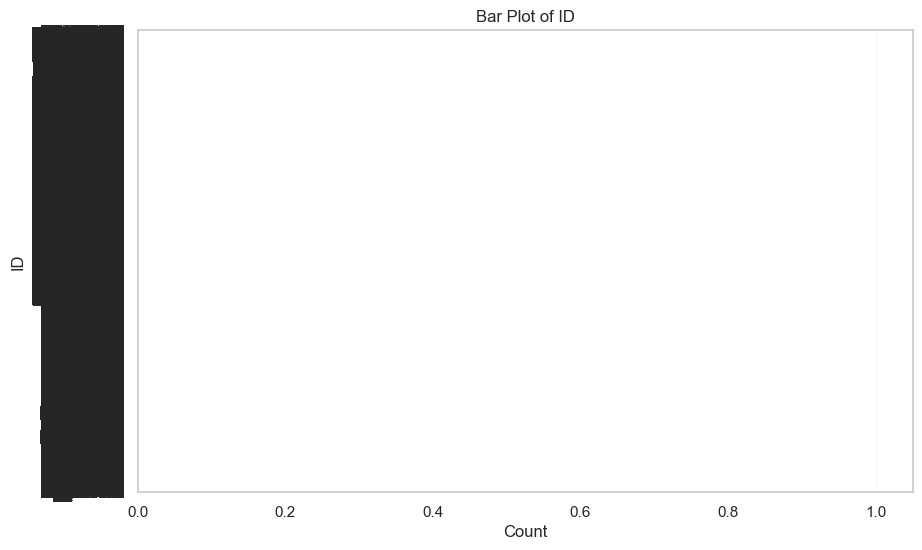

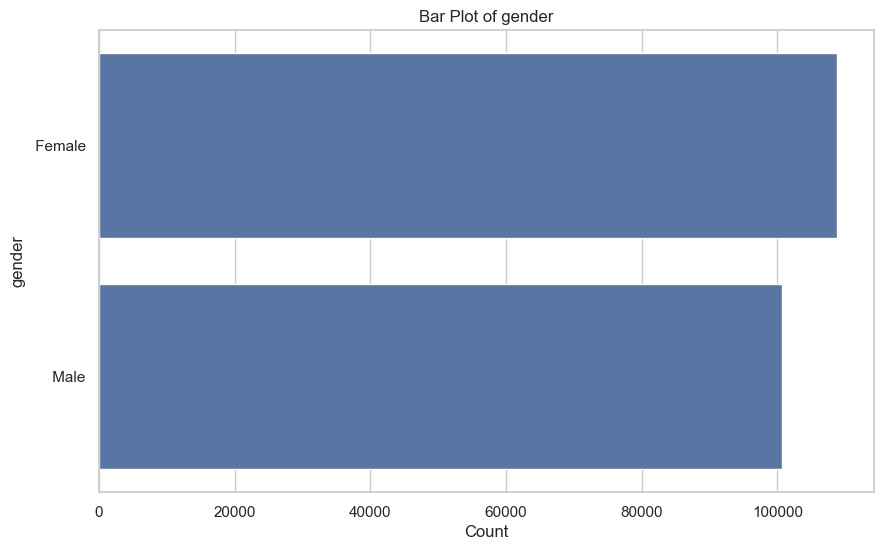

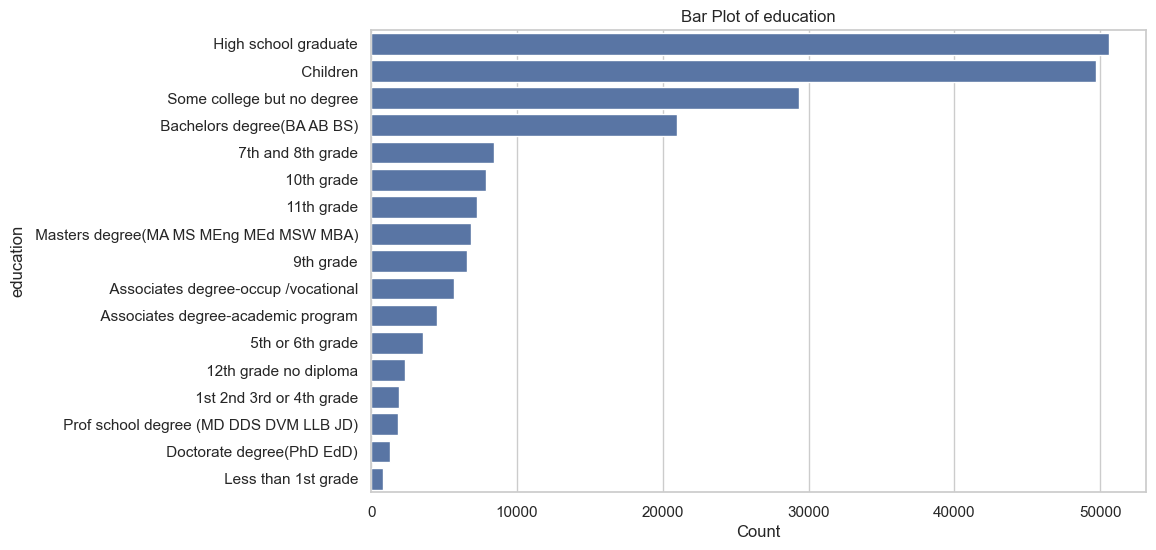

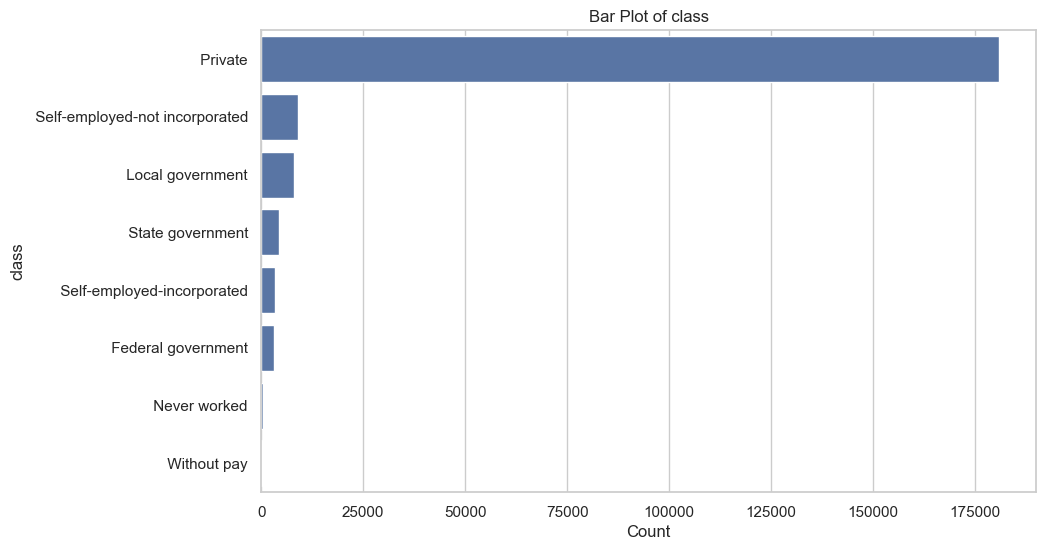

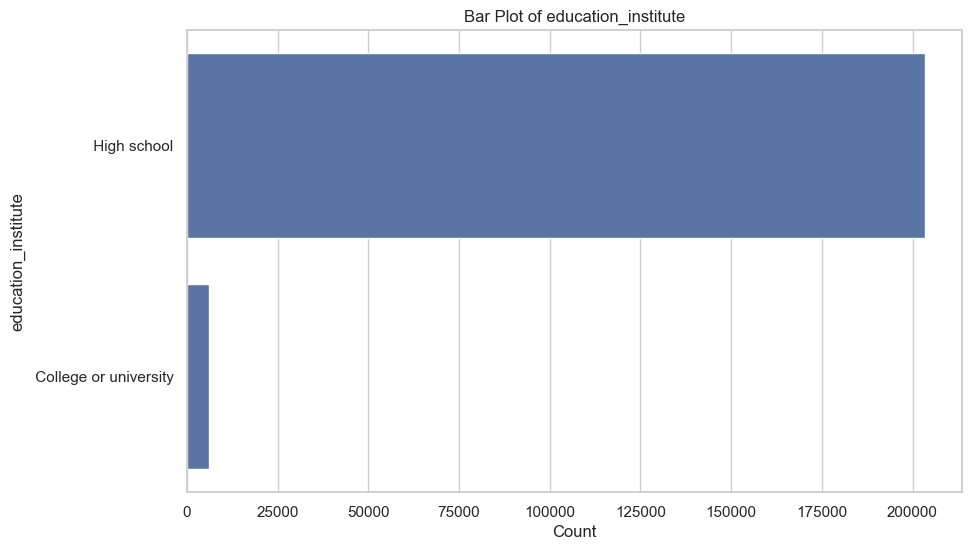

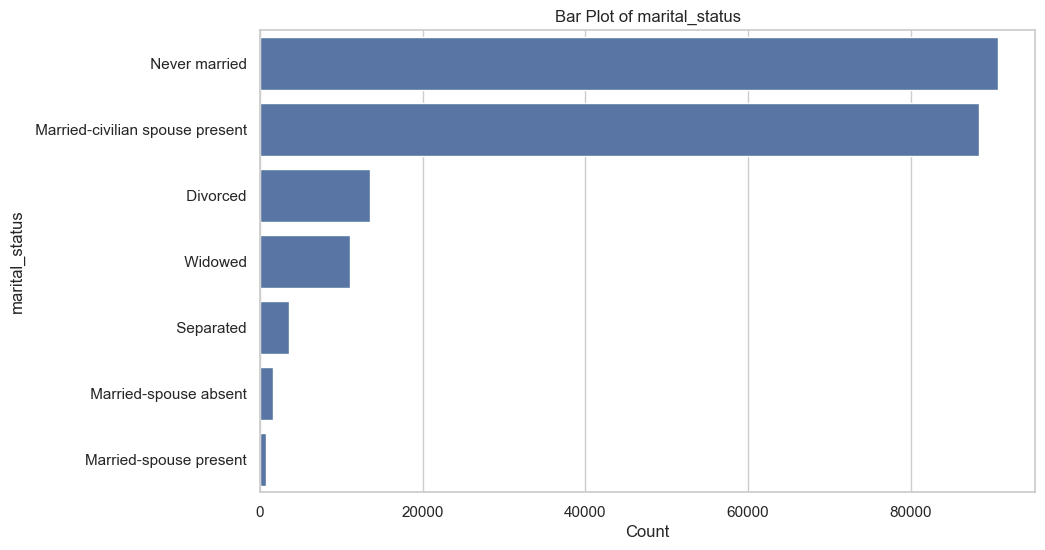

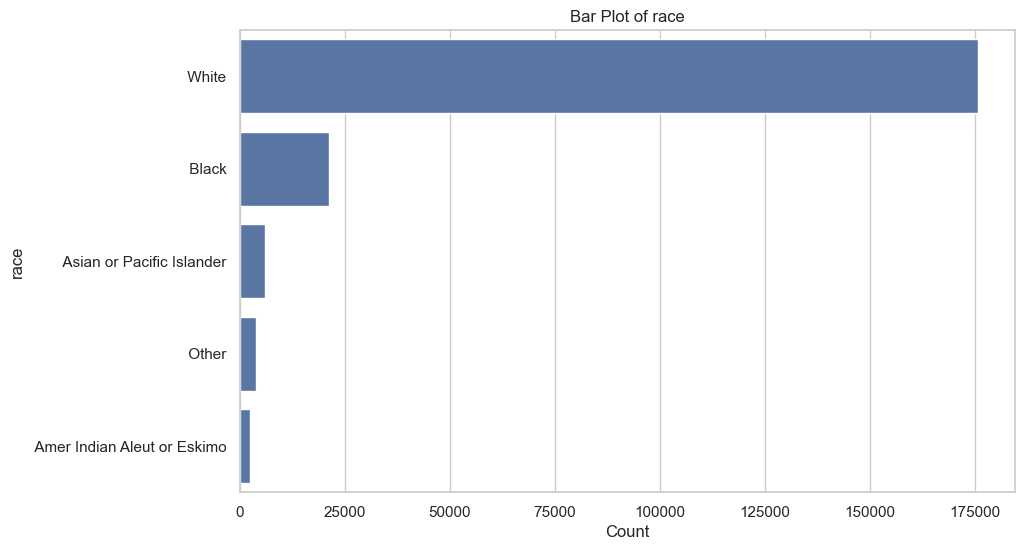

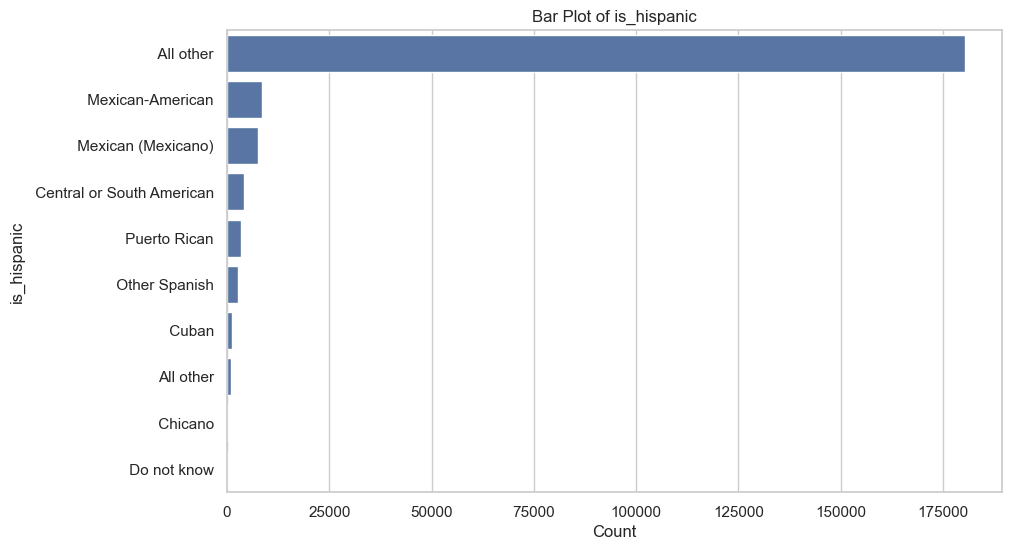

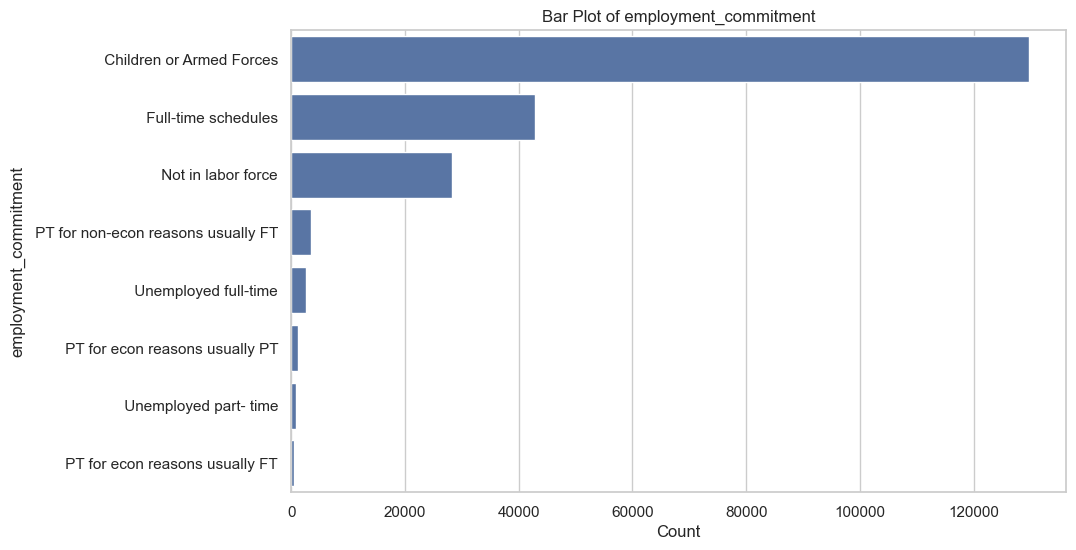

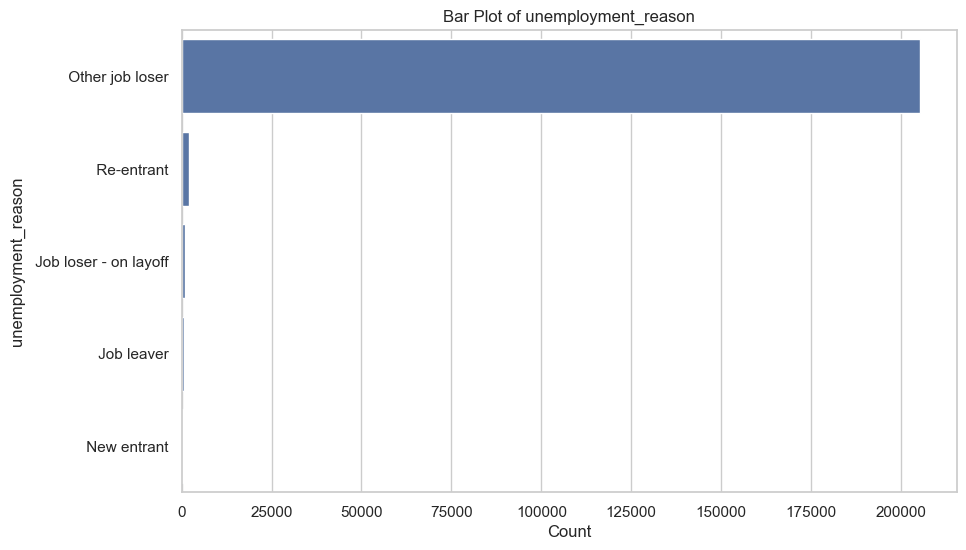

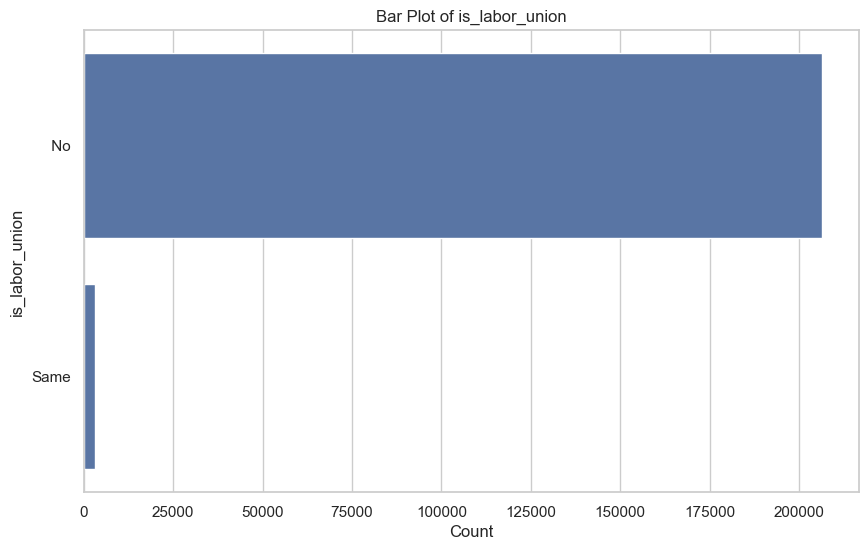

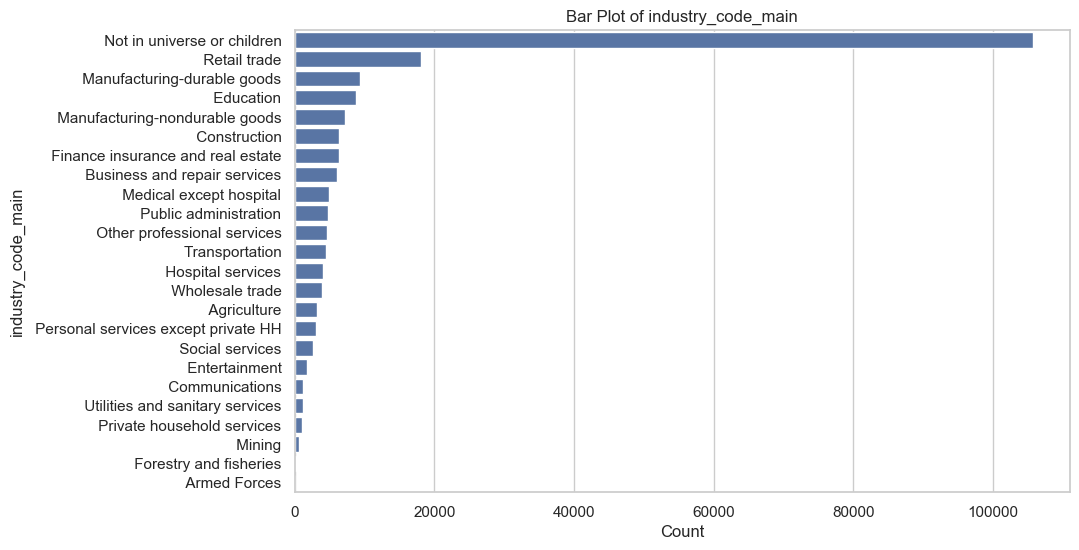

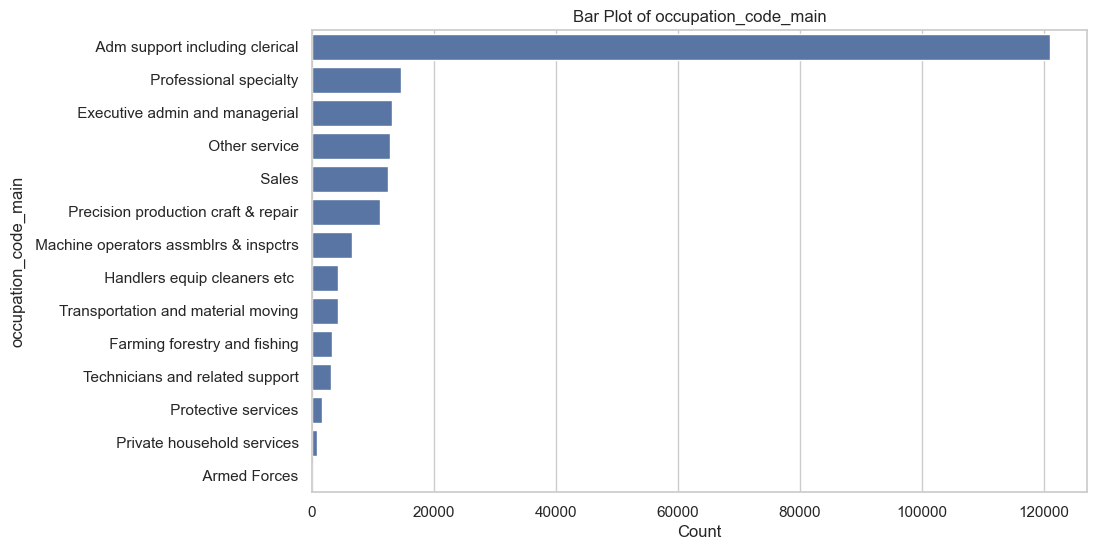

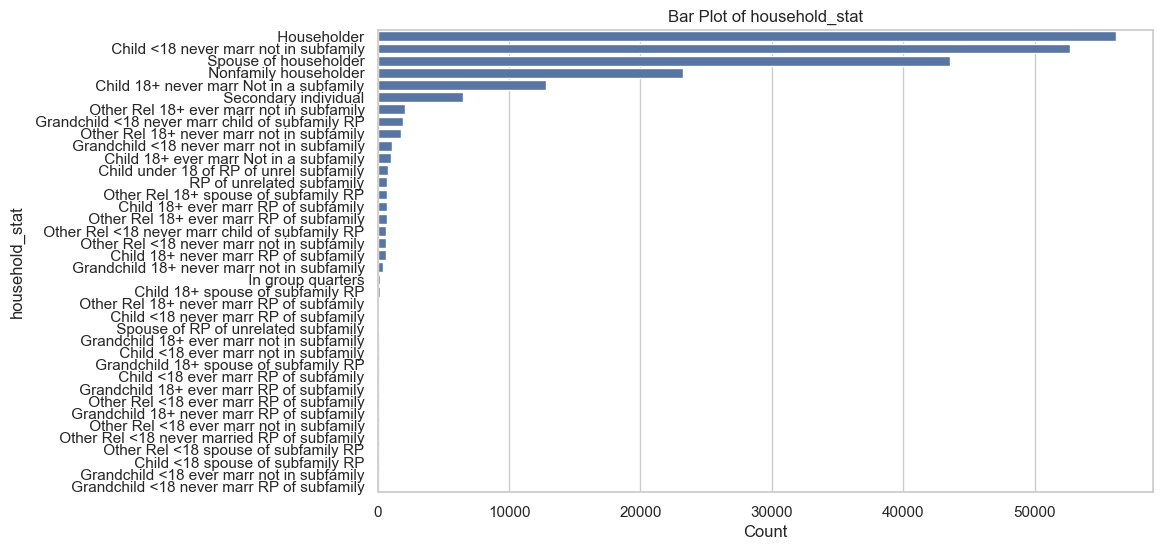

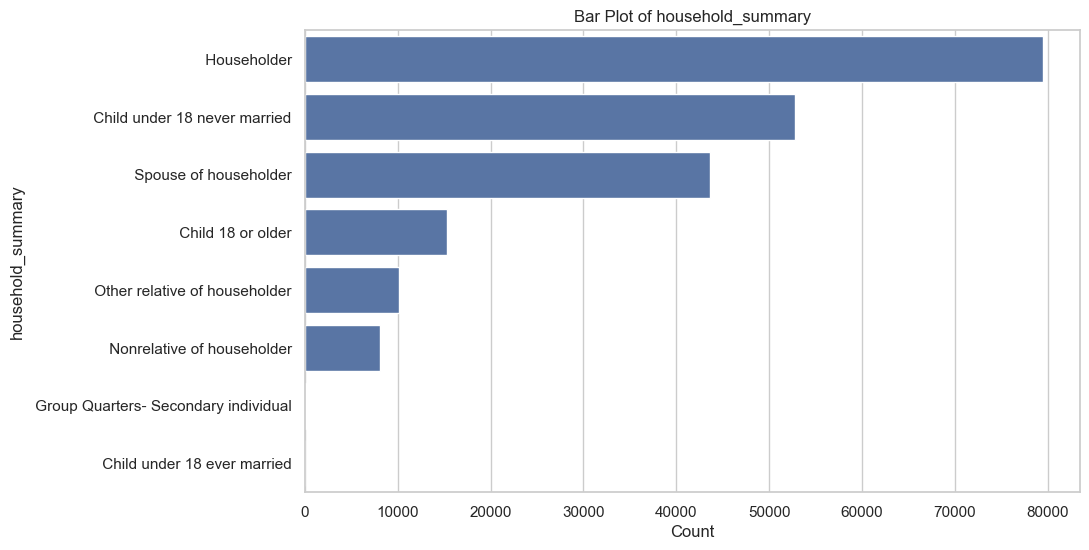

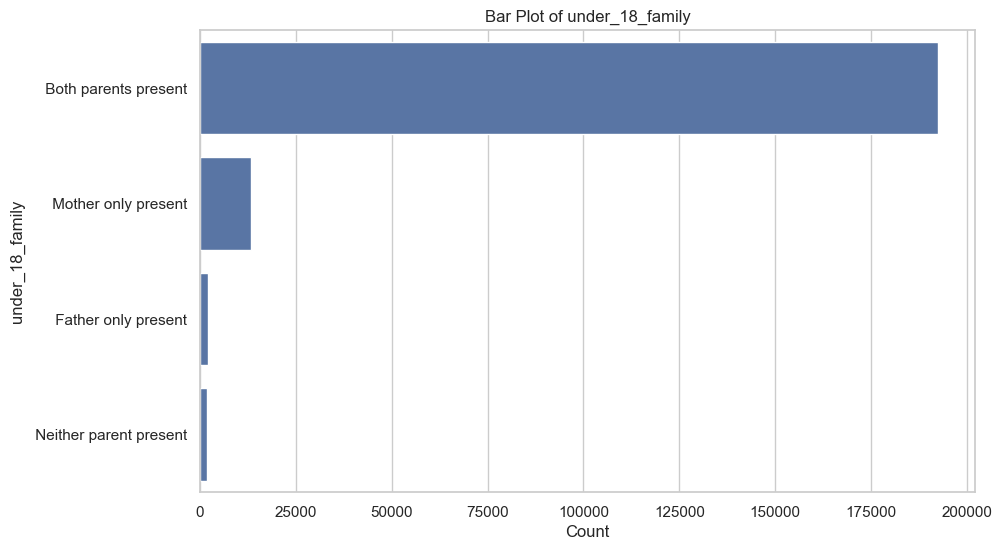

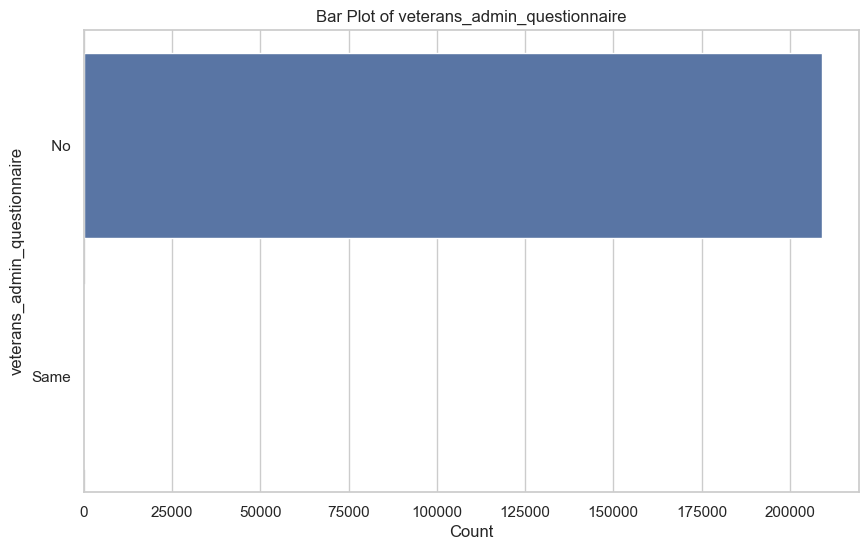

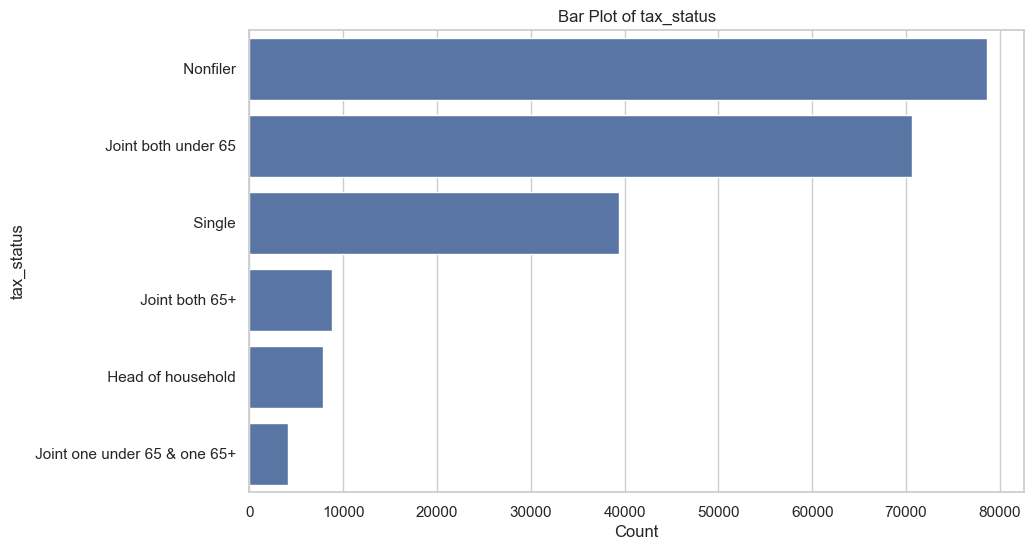

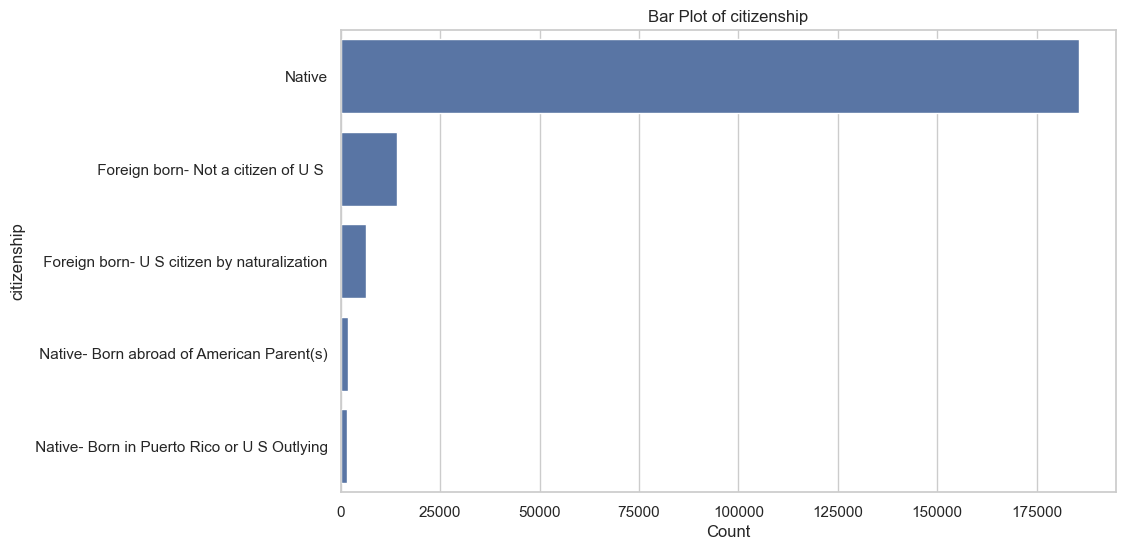

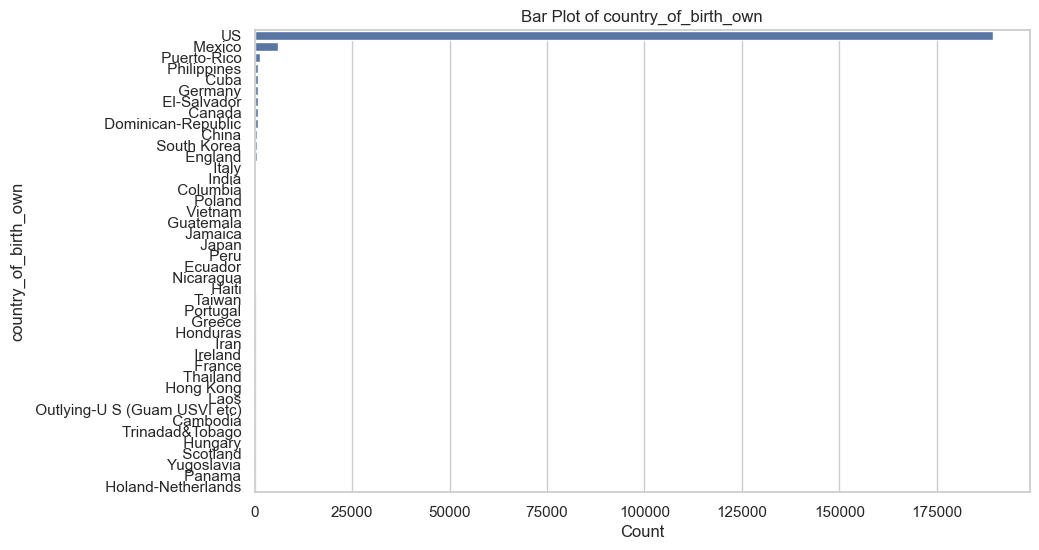

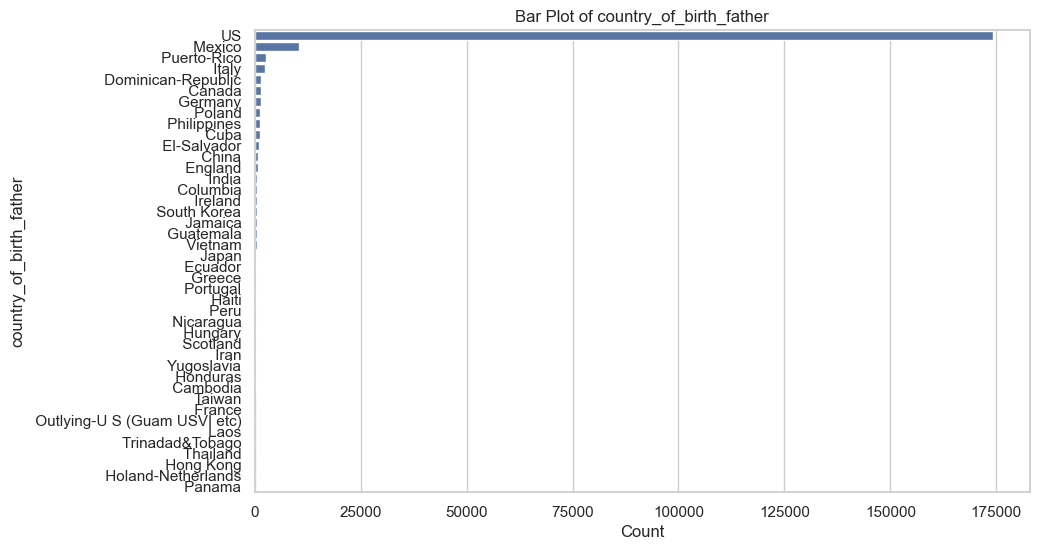

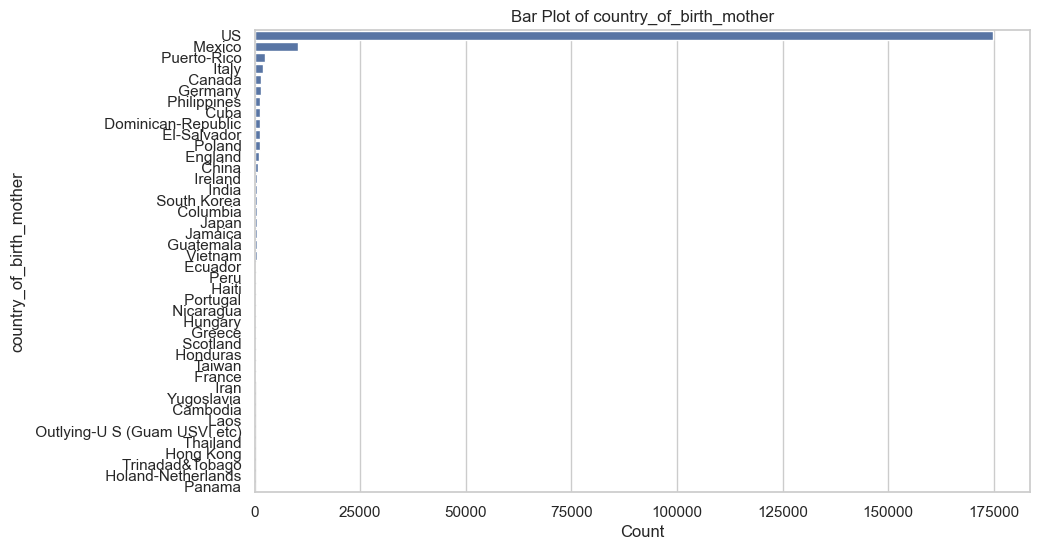

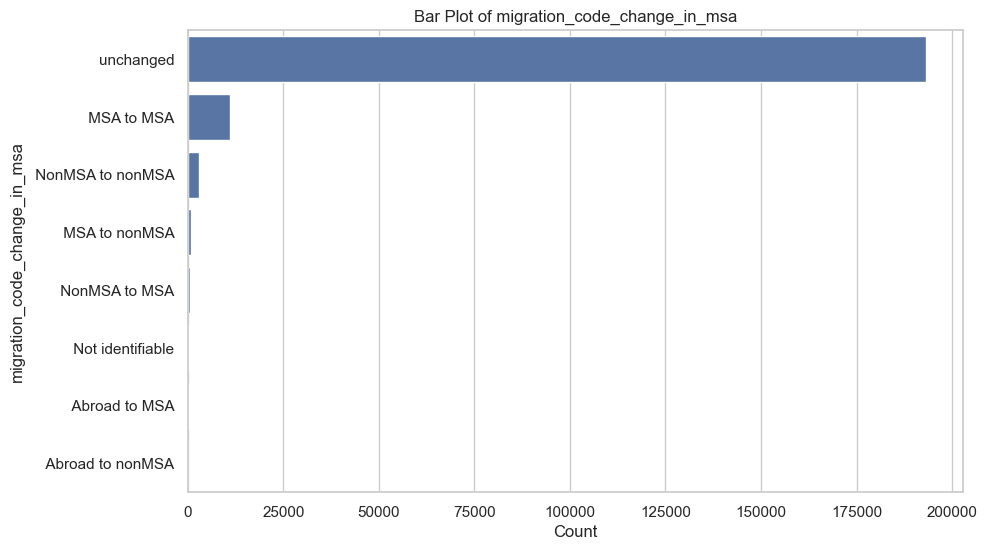

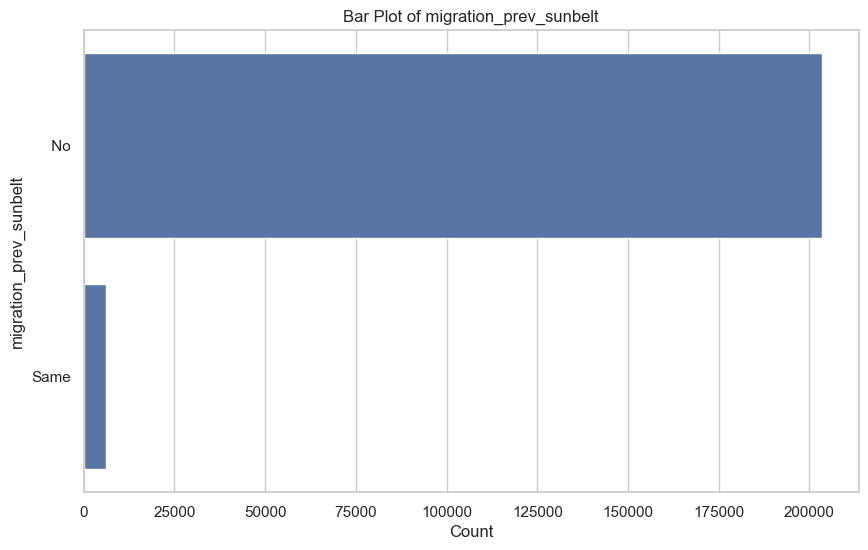

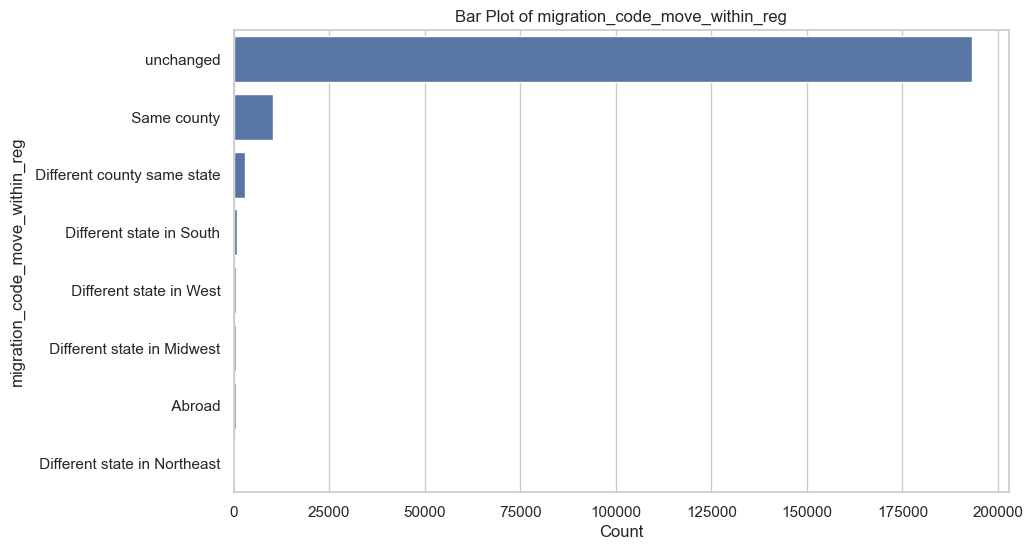

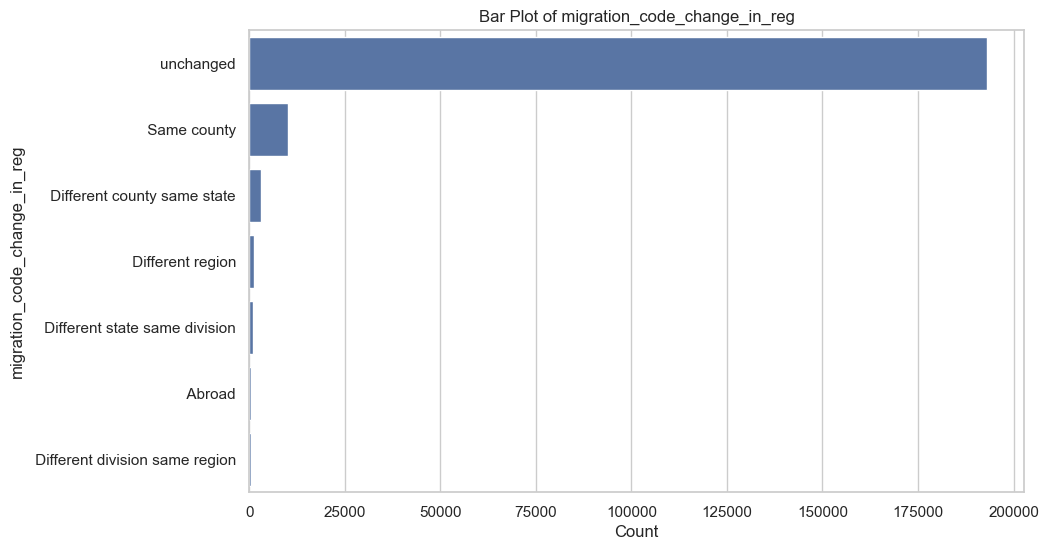

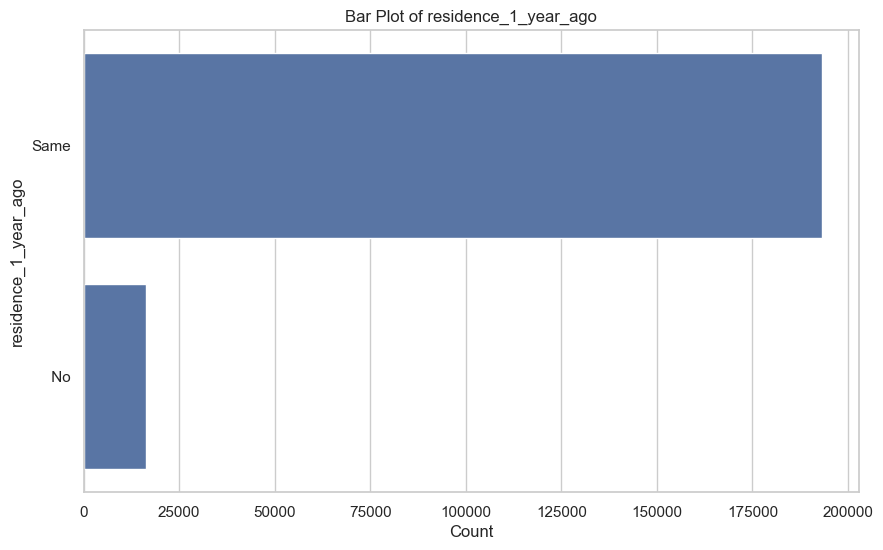

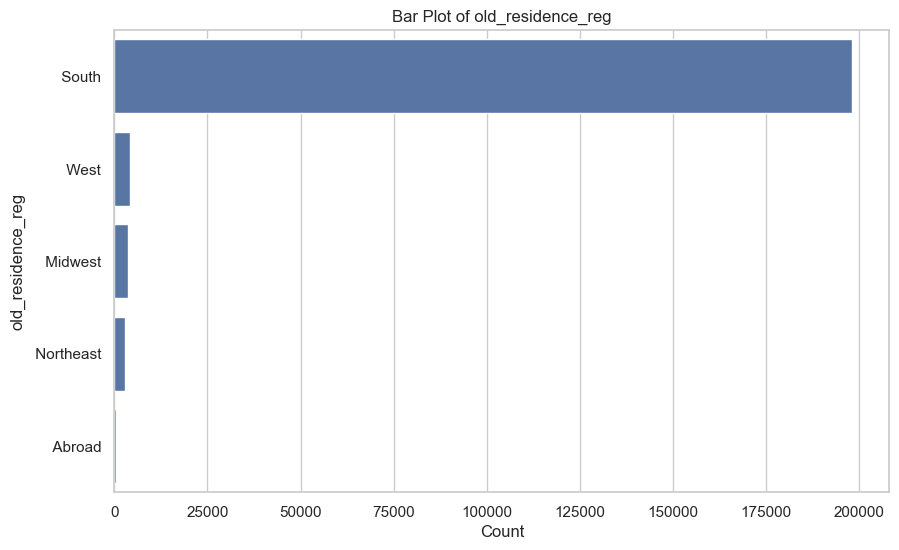

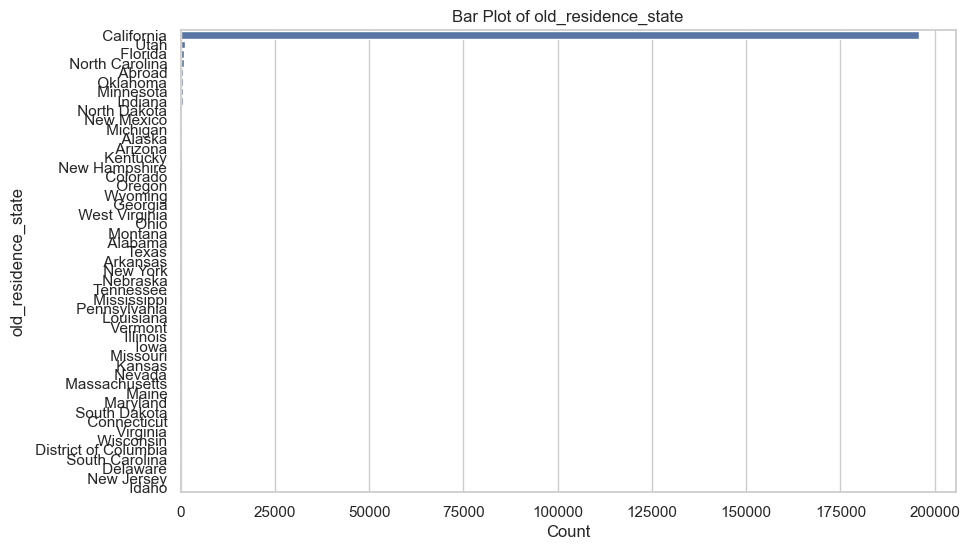

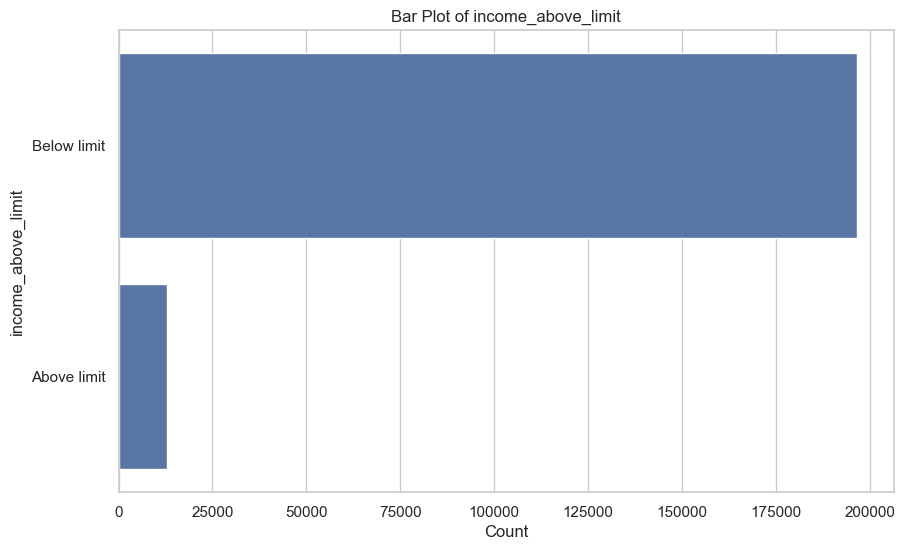

In [61]:
# Set the style of seaborn for better visuals
sns.set(style="whitegrid")

# Loop through each categorical column and generate plots
for column in Categorical_column:
    plt.figure(figsize=(10, 6))

    # Bar plot
    sns.countplot(y=column, data=Train_df, order=Train_df[column].value_counts().index)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()